In [1]:
from pymongo import MongoClient
import urllib.request
from io import BytesIO
from PIL import Image
from gridfs import GridFSBucket

In [2]:
db = MongoClient().python_test
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'python_test')

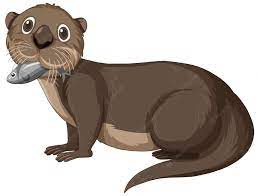

In [6]:
url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBUVFRgVFhUYGRgaGhocGBwaGhoYGh4cGBgZHBgaHBgcIS4mHB8sHxgYJzgmKy8xNTU1HCQ7QDs0Py40NTEBDAwMEA8QHhISHzQkJCE0NDQ0NDQ0MTQ0NDE0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0MTQ0NDQ0NDQ0NDQ0NDQ0NP/AABEIAMQBAgMBIgACEQEDEQH/xAAcAAEAAQUBAQAAAAAAAAAAAAAABAEDBQYHAgj/xABEEAACAQIEAgYGCAMHAwUAAAABAgADEQQSITFBUQUGImFxgQcTMpGhsRRCUmJywdHwgpKiIzNDRLLh8RXS0xdTk8LD/8QAGAEBAQEBAQAAAAAAAAAAAAAAAAECAwT/xAAeEQEBAQEAAgMBAQAAAAAAAAAAAQIRITEDEkFRE//aAAwDAQACEQMRAD8A7LEsYvELTRnY2VQSx5AbzRMX6RyhuuFzJfb1gFTL9rJlIv8Adv5yWye1kt9OhS3UqBQWYgAakkgADmSdpqDekDDNSzUQ7udMjKyZT95yLfylvzmn9KdJ1cQ2as2YXuq7Iv4V595ue+Z1uRqYtbv0r17wtKwpk1yb39WRlHeXOh8rzD4r0iOUJp0AraWLN6xd9QVXKRpxvNWlAJyvyabmMtuo+kQHIr0crF1FQ3LIE+sygDMW+7a3eZtXQ/WDD4rMKNTMV9oEMpAOxswGneJyZkB3AnhaWVgyMyOPZZCVI8CNpZ8l/S/HPx3KJpPVHrcajDD4ggVNkfQB+48A/wAD3HQ7tO0ss7HKyy8qsREqEREBERAREQEREBERAREQEREBERAREQEREBERA1fr+5GFsNmdA3gLsP6lWcgxBNap6oewurnjpwB4cp3Tp7o/19B6VwCwupOwZSGUnuuBfuvOF9F0nUsCbEk5yDfY8Dy7++ct+PLt8d8cZenTsAiLyVVHEk2A8yZk0xWHwtJK7UaWJD1DSLO9yzKpLerp5Sq0xawY6kkGwBEj9HYctUVE0cpVCcO36mpk155ss1Kh0S9SsQFsV1e4IyBdy+nZA7/npMZn6uv43Pp1KQrXoC1N6dOqq7BfWAmwH1dADbhcyBLNSqSQF1ZgqoDwRFCKW8FA8zaY7EsVc2diRub2F+NlGlu6OdqzxGXlGYDcgeMt4OrnUHjs3iP3fzmfwGKahhnr0lpPWyPWqNUuctFXZFVFFrsSjHcbDe4kme3hdcYGtTzDexGqkaEHgQRL2P679ICymsFUaMUppn8ywIv4Wkk4tMVR+koio6uErogsl2vkqKp9m5VlI52PecL0nQzC+3C/6iXzmnjTc+qnWiuKqU61RqiVGCguFDKW0UgqBcFiAQedxtr0mcK6lZqtejQ+ulRG/gRg7G/CwW3ms7rOubeOW5JfCsRE2wREQEREBERAREQEREBERAREQEREBERAREQMX1hr5MNVa5HYKixsbv2V14dphrONYfDhGZfs/BftE+6dc65qTg6pH1cjnwp1EdvgpnMqVPPTDkXuqknQXIF7XOm/OcPlvl2+OeEamVzBlbtAgghjcEagg30k/pPpavWQrUqM6jXLooJG2bKBm87zwuFGUWprrrdmvpwscuWHo3GzbdzXH4lHzHnMTrpeNSwmNJaoAxzgkHXXLw1khU4zG9LYZsPX9aourb+MiYjpWo/YpqQTvbU++2k6Sd9MWthw2LCOBsGBv5W1+MndNYBquHSqnaWnmpvbXJ/aPURm5KwqEX2uvhMV0L0ZV0eqSTawvwG5HedpteEFekxalnRiLEqNx3razDyMnZKvOxb6t4FqOBxD1OyKzUlpA6Zij5mZQd1A49xkOutxa9idByPdJOLq1mbNXZmbZWe9gOQXZfKQ6zhgyHRhqO+2oImdXq5nG7+i3DqErNZc2dVJygOLC9i3FfZt3htOJ3+c59FLEtieVqV/G9WdGnbHpw37ViIm2SIiAiIgIiICIiAiIgIiICIiAiIgIiICIiBYxSKUZW1Uggi17g6EW43va3fOWYrDmnVq0LFchNma3ZRtaYUDQWUja50O2w61NR64dEPUUV0UtUpgkrfQqSNl+sygE20vc76CY3nsbxrlamaOddBdxsHNiwO9gD3aXOoMx1S4OoykcLZTJdCoCtw4Da3a++UkM198twRcak38J7TpNycqhiNhcBie+x18vnvOEldrYxGMwpqJqNNdTsdO/fW0UMMiCyoq+AAPnM7iMBiailvVvoL3ay6X9kAkSx9F9YuZPbA1XbMOBHfzi9ntey+kKm5B0a19+XmOI7pIpg5rBsjb6aq3Ij9LHw4S3WoENltY5QbHnluR7wZVUuABqSCU5gj2l/MeXMwibhOkGJKVBfmD2lIOzqTfTmNeY0vax05gUZEdNG28ddAe8ai89eqNxc2biOTkHs92YNe3M8LGQOlekMlFhyfs+IA/O0n603T0WUwKFZrWJrWJ7hTplR/UT/FN4E4t1f8ASBiKChWpUnQbaGm5sABdxcMbAC5W+g1m2YH0oYVtKtOpTPMAVE969r+mejNknHm1Lb1vsTA4XrjgHtbFUhf7berPuexmVpY+kwutVGHMMp+Rm+spUSx9Lp/bT+Zf1lPplP8A9xP5l/WBfiQavS+HT2sRSX8VRB8zIT9bMCv+boH8NRX/ANJMLxm4mrVuv/R6/wCOWP3adRviFt8ZDqekvBj2Urv+GmB/qYSdhyt1iaJ/6n4a/wDcYkDnkp/+SSqPpHwB9p6ifipuf9GaOw5W4xMHhut2Be2XFUhfYMwQ+57GZejWVxmVlYc1II94lReiIgIiICIiAiIgIiICYzpbpBaQF9SbkLtci1gTwFze/dJmKrhEZiL2BNudth5zR8fVrNWRxWTKbGqmQsWFjampvlCG5DBgbaEdq8DD4YeurvWqZb5uXZzdw7gPjM6MXk0RQvNiAXPnw8JgqjrSDkn65JA3IIU3txtMTjOnwWCIeyQbgb6bEnh4QM90h0kNQxLnjc3A8T+k1j/qLI3ZGcX0y9kjwPGWT62rfIjMAbWUHKDa4BbYGwJsddNBLuFRk/wyXPE6eSgzG7nnK3ia74bDQ6RqFQWQ6KrWbJfVxyOmh4zGYrpt0YoECZW4AA2G40HGw17pWvWcsVynKalOmCLeyujt4aIfAzBJ0gXrWdNS+hJv2TnuO+5KW85yzJ3y66tk8MticYmWoFNkAzA8Tlca89mbzM1/pPFetfMPY9qx01YAv/USPKeq2KLO6ZVI7S5gMpC32vsdhwlVpAC3z1l+sifa32gs3unmTmpKeHu0katSy+EopTS/hL30RDz+Es03ym/vk4GQWTgE/dv0nn6Gn7tJRGl55gWBhV757FBeXxMuRA8qgGwE9REBKgA6ESkrAtPhl8PD9JZSk6NnQlW+0hKt7xrJcqhgZDo3rtjqFgK5qKPq1R6z3ubP/VN26F9J2HchcQhoMfrXz0z4sBdPMWHOc3rYdSPvTHOnAzU1YlzK+laFZHUMjKysLhlIZSOYI0Il2fOXQPWLE4F70X7BN2Ru1TbndeB+8tjoNbaTsfVPrtQxwCf3de1zTY3vbco2mYe4jiBNzXXO5sbXERNMkREBEpEC3Xoq6lGF1YEEcwZqmM6lkk+qxLoPsuvrAO4EMpt43PfNwiBz1/R07HXGacQKNv8A9JP6M9HmEpnM+eoeRIRP5UsT4EkTc4gQqmAT1RpKqotuyFUAKRqpCjTQ2M0rFUsrXYa3NxvZ1Nj8dbzoM1zrHg9c4Ht6H8SjsnzUEfwjnOfyZ7Ot41y8aTicKERmXU2YAHUdvQn3ae7lNCqvkbMultQDupH1T4HSdLZbix46Gc86fw+So456/Gx+IPvnLNdtLPR66HnuT47D3a+cmEyLgPY+J8SdPgJJmmSeXGhnqUIgY8yZhX08JDIl7DPa/l+comsNZQraeyLb89J4Y3kFIiICIiAlQZaeqBLfrGbbQczAkgT3oJYRCN2Y+GglBSHNveYF3NLVenmFxw2nsCeiSIGJqjSWEcqQykqwIKspKsCNQQw1BHMSZiV1uPEfmJBlK7P6PevP0m2GxBAxAHZbQCqALnQaBwBcgaEAkcQOgT5bpVGRldGKspDKw0KspurA8wQDO9dSOt1PHUwpIXEIo9Ym19gXTmpPDdb2PAnpnXXLWeeW1xETTJERAREQEREBI2Mw4qIynS40O9iNVNu4gHykmIHO8XTKsQRYgkEcjxHfzB4gg8Zp/W/CXAcDx89D8cvvnT+tHR5K+uUXKj+0UblR9YDiy/EeAE0/G0BUQjRri45EEbeYnn1Prp6M6+0aB0YLBh4H9+74yVLVSkaVTKdjseYP5iX3GsqPMREDH4jQt5y/h01B9/ulvHjTyMuYHn4f7yiUxvKREgREQEtYirlGm89u1gTIdJC7d3H9ICjTznjaTUQDYSoAGg2iAJiIgJ7TlPIiBAxKWY246yATMhiXuR4frIJS7EDnKUKaAjzl3o/HVKFRK1JsjobqfmCOIIuCOIJlwKLWtLDpYfvygfQ/VTp9Mbh1rLYN7NRb3KOAMy941BB4giZufP3UTrGcFiVZmtRqWWsOAF+y/wDAST+Et3T6BnWXrlqcqsRErJERAREQERECk0frH0M1AmtRW9I6ugHsHi6j7PMcPD2d4iZ1mWcq51c3riPS+HSsOzo247j48jMDSJsQd1Nj5f8AE2rr0fo2NZVQerdEcKotlvmVsvDdCbd/Ca7XZHbOhuGHaGxBXYkeHynHll479lnVqIiVEHpJtLfvX/iSMAvZ8f8Ab/eRnTO4XgSduQE2mh1fUoCrkb6Fc2xPL9ItkXjCxL2KoMjZW352Ivy9oAyzCERAECJiWOa3cB+clU6eRQOPHx4yLW7LHneS0N1B5/v9YCIiAiIgVX9flLddyFvyM9s1heRcTUv2eW8CyF48JYJGYge/wl9qthIlL2hKJVPfznquliRPWHS5/fEGe8WNQf3+9YGNqJY2ndfRp0z9JwSqxu9E+qe+5CgZG13uhUE8SGnD644zd/Q/jimMelfs1aZ/npG6/wBLVJrN8s7nh2qIidHIiIgIiICIiAiIgcm9LyWr0W50yP5XJ/8AsZomGFmF+Onv0m+elrEoa1FQwLKj5gCDbMy5bjgey058H7S6/WHznLXt2z6T5brPYH4S6Z4XDvVdKKLd3YKo5k8+QG5PADumVWejk7Rbl2R8z+U3XoyrYlSfDyvf5yL0v1Nr4U5URqtPLfOq3tsWzILlTcnmLe4R8PUuFYHzHOZ1L3y1myzwztfBU39pFJ52sfeNZAq9X6R9ksvgbj+q/wA56wuOy9ltRwPEfrMilRW1UgzPa1xgn6uH6tQea2+IMtv1fqDZk97f9s2Sec45j3y/ap9Y0XpXoh6eZ2Km1jpc76cQJYwrgrbl8v38ptnTCI4y3BupVrG+h/5M0ZCyMVPtKbdxms3rNnGRiWBihxHulTiV75UXokf6SOUt1MQToNB8YHrEVb6DYSwZS8s1KnASilV76SuHXUmWlF9BJ2Gp6gcBqYF/Crv4/L/mMXw7vztLyLYfvcy1iToe828hIITi9h3zO+jm/wD1PDWv7VW/h6irv8Jg2NtZufofwBfFvW+rSpkfx1DZf6Vf4TWfaa9O1RKROrirERAREQKTB9a+mxg6DVeyWuAisSASSLnTUgC5txta4vM5MN1i6Ao4ynkqjUXKOLZkY8VuLcBodDJVnvy5Vjuu+Of/ADGQHYKioddrAAv7yJh8Z0tiTfPiKzA7h6jD+jMbeYnSl9G2ESmSatfOCWarmXPlAN1AylQONwM2m/Cc7dqSOzUCQgY5XJIbLfTUElmtYkiwvyFhOd7PbrLL6QF6MxDdpcNWynYilUCnwbLYyw+GdXCshBBBN+Gv70mSqEsMzMTfXNUY3PeF7TeZNpkMD1bxlYXp4dyv2my018QXIzDwvIvr2xRM3f0T4Okz1q5INRMqop3VGBJe33rEX4ZW5zGr1Fx5/wAJB41F/K82vqF1SrYN6lWsyXdQqqhLAC9yWJA12AAvx11msy9Z1ZxvMwvSXVvD1yWZMrnd07DEnieDHvYGZqJuzrnLxoWN6j1Ab0qiuOVS6n+ZQQT5CYmp1bxin+5bTirI3uAa/wAJ1OJi/HGp8mo5K2HxQ0NKt/8AG/wbLI1WhVJuyPfvRh+U7HEn+U/rX+t/jja4KqdqNU/hpu3yEw3THQ7Zr1SlA7j1jqrW4Xpglz5KZ3204P1n6iYqgxfI1dGJJamGYgkn2wxZx4gHfU33fTnlZvrVTWAJXMrgG2YZgD3jMAbeIBnsVxKt0VUP+FVPcKVQ/kPlItXBOhs6Oh5MjIfcwg6kpWB2lHrW0EjNYaKD4y1lPfB1JZyd5RVJlqkjEjeZRKBPCw/fCRVqlTtoNTMhRp5R3neUp0wv6y4JBXYXkLEDidzsOQkmrVA335THVapY2AJYkAAAkkk2CqBqTfgIFKoOgsT3DUnkABue6d46h9X/AKHhVVh/aOc9TuYgAL/CAB45jxmv+j7qOaOXE4pR63enTNjk+83N+Q+r47dGnTOeOetdViIm2CIiAiIgIiIFJgT1SwRrHEGgpqE31LFL8xTJyg8dt9d5nogYno/q5haDZ6dFQ32jmZh4FiSvlaZeIgIiICIiAiIgUlZaq1VRSzMFUAkkkAADcknYTnnWL0gNcphRYbetYXJ/Ap0Hi1/w8ZLZFktb10j0nRoLnrVFReFzqe4Lux7gDNJ6W9I4Fxh6Wb79S4Xusim5HiVPdOfYrEvUYu7M7HdmJY+Fzw7pamLqtzM/WZx/WXGVz28Q6qfq0z6tR3dmzEeJMw1Wkt76knckk37yecTw1RRuwHmJnrfOPPqF5fEyoorynhsWg+t7gTLTdILwB+AkEtVA2AlZj0xzu2REzNwCgu3kBMvg+qvSVexXD1FB4vlogd5DEMfIGXh1FeoBuZFrY4Dabx0X6J6zWOIxCqOK0wXa343sFP8AC03bofqJgcOQy0Q7i1nqn1jXGxAPZU96gTUzWbuOR9BdVcZjSCiFKZ3qVLqlua8X0+yLcyJ1rqt1Iw2Csw/tK1tajjUc8i7IN+Z5kza5SamZGLq1WIiaZIiICIiAiIgIiICIiAiIgIiICIiAnhiALnTnPU1br5i3FBaFIFqmIbIqjcra9TytYE8AxPCS3iydaT1y60timKUyRQQ6cM5B9tu6/sjz39nWsPSaowVUZ24Kilm9y62nSOg/R7TUBsSxdvsKSqDxI7TH3DuM3PB4KnSXLTRUXkqhR523Mz9bfNb+0niOU9H9Q8ZUsWCUV++czdxCrf4lZsGD9GdMAetxFRzxyKtNT4hs7e5hOgSkszGbqtSp+jzo8e1Sdj96tWPwDgfCSk6jdHD/ACtPzzH5mbHEvInawC9Tejx/k6PmgPzkin1ZwK+zg8MPCjT/AO2ZeI4dWqGHRBZVVRyVQo9wl6IlQiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICWWoqWDEDMAQDYXANswB4Xyj3CIgXpSIgViIgIiICIiAiIgIiICIiAiIgIiIH//2Q=="
data = urllib.request.urlopen(url).read()
Image.open(BytesIO(data))

In [8]:
#MongoDb로 파일을 업로드할 객체 생성
bucket = GridFSBucket(db)
bucket
# p_bucket = bucket
# p_bucket

In [10]:
grid_in = bucket.open_upload_stream('otter33.jpg',metadata={'contentType': 'image/jpg'})
grid_in

In [11]:
grid_in.write(data)
grid_in.close()

In [14]:
image_list = list(db.fs.files.find())
image_list

[{'_id': ObjectId('6360891c58c6a22afdc85c99'),
  'filename': 'test.txt',
  'chunkSize': 261120,
  'length': 35,
  'uploadDate': datetime.datetime(2022, 11, 1, 2, 49, 0, 623000)},
 {'_id': ObjectId('636093bbc014fc4bb828a8f5'),
  'filename': 'otter33.jpg',
  'metadata': {'contentType': 'image/jpg'},
  'chunkSize': 261120,
  'length': 5665,
  'uploadDate': datetime.datetime(2022, 11, 1, 3, 34, 35, 852000)}]

In [15]:
real_img = Image.open(BytesIO(data))
real_img.show()